In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Xleft = pd.read_csv('data/kolverl.dat')
Xright1 = pd.read_csv('data/kolverr1.dat')
Xright2 = pd.read_csv('data/kolverr2.dat')
Xright3 = pd.read_csv('data/kolverr3.dat')

In [3]:
Xleft.head(5)

,theta,psi
0,0.933702,1.11810
1,0.933753,1.11815
2,0.933799,1.11820
3,0.933841,1.11825
4,0.933881,1.11830


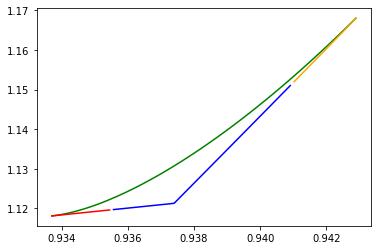

In [4]:
plt.plot(Xleft['theta'].values, Xleft['psi'].values, 'g')
plt.plot(Xright1['theta'].values, Xright1['psi'].values, 'r')
plt.plot(Xright2['theta'].values, Xright2['psi'].values, 'b')
plt.plot(Xright3['theta'].values, Xright3['psi'].values, 'orange')

In [5]:
result = pd.concat([Xleft, 
                    Xright3.sort_values(by='theta', ascending=False), 
                    Xright2.sort_values(by='theta', ascending=False), 
                    Xright1.sort_values(by='theta', ascending=False)])

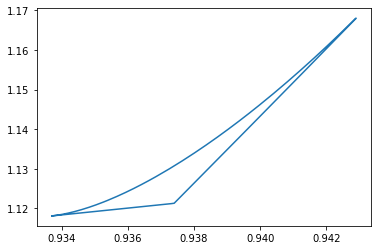

In [6]:
plt.plot(result['theta'].values, result['psi'].values)

In [8]:
from matplotlib.patches import Polygon
import matplotlib as mpl
import seaborn as sns
#https://matplotlib.org/users/dflt_style_changes.html#hatching

In [9]:
x_min, x_max = result['theta'].min()-0.0003, result['theta'].max()+0.0003
y_min, y_max = result['psi'].min()-0.002, result['psi'].max()+0.002

(1.1161, 1.169999999999995)

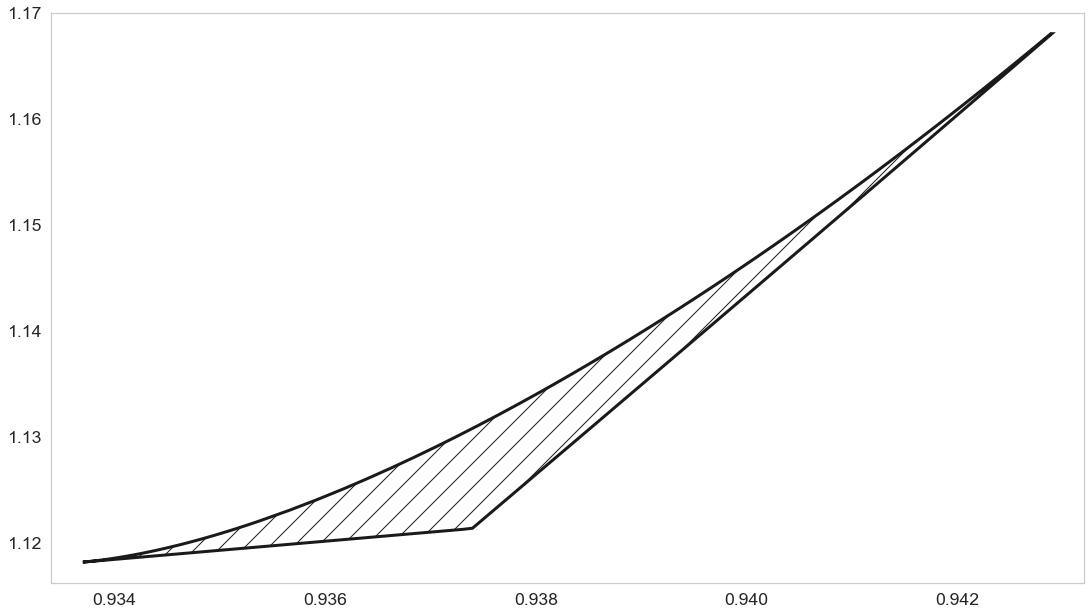

In [10]:
sns.set(font_scale=1.6)
mpl.rcParams['patch.linewidth'] = 3.0
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.grid(False)
ax.add_patch(Polygon(result.values, color='k', closed=True, fill=False, hatch='/'))
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

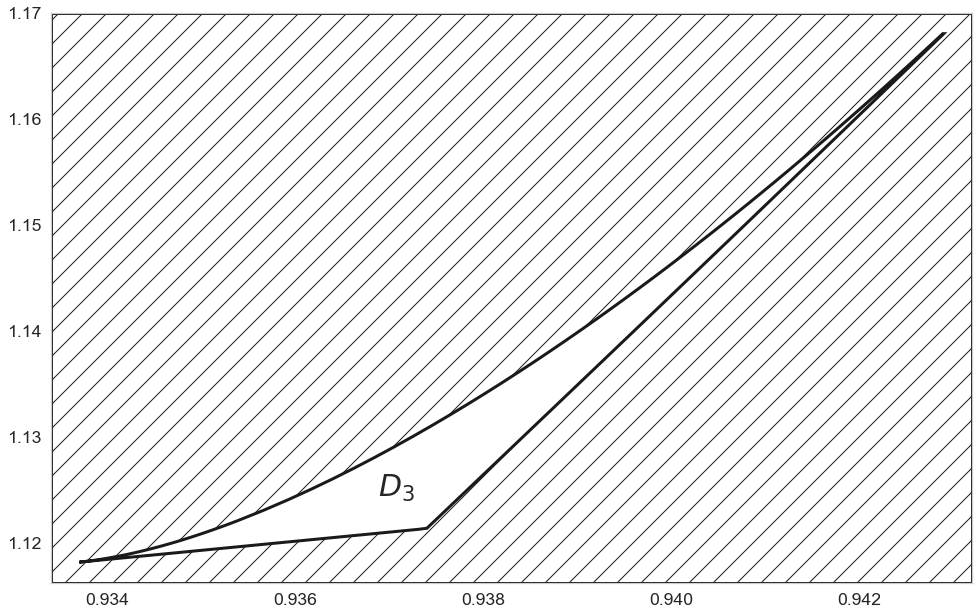

In [11]:
sns.set(font_scale=1.6)
mpl.rcParams['patch.linewidth'] = 3.0
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(16.5, 10.5)
ax.grid(False)
#делаем штриховку всего прямоугольника
ax.add_patch(Polygon([[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max]], color='k', 
                     closed=True, fill=False, hatch='/'))
#рисуем замкнутую область и внутри заливаем её белым
ax.fill(result['theta'].values, result['psi'].values, facecolor='white', edgecolor='k', 
        linewidth=3)
fig.text(0.4, 0.24, r'$D_3$', fontsize=30)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.savefig('graph.eps', format='eps')